# Logistic Regression

In [3]:
# importing the required modules
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import plotly.express as px #Plotly Express

import plotly

from plotly.offline import iplot

from tqdm import tqdm, tqdm_notebook

from sklearn.linear_model import LinearRegression

In [4]:
# Generating the dataset
online_retail_data = pd.read_csv('US  E-commerce records 2020.csv', encoding='unicode_escape')
print(online_retail_data.columns)

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [5]:
df = pd.DataFrame(online_retail_data)
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


## Data cleaning/preprocessing

In [6]:
def convertValues(column):
    value = column[0]
    if(value<0):
        return 0
    else:
        return 1

In [7]:
# binarise 'Profit'
df['Profit'] = df[['Profit']].apply(convertValues, axis = 1)
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,1
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,1
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,0
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,1
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,1
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,1
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,1


In [8]:
df.groupby('Category').sum()

/var/folders/02/w4d460591h55yhlm9vqhn4s00000gn/T/ipykernel_1411/86654594.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,3530562,38143653,215387.2692,2437,116.52,451
Office Supplies,10121328,113202525,246097.1750,7676,320.40,1706
Technology,3196610,34743560,271730.8110,2363,81.30,535


In [9]:
df.groupby('Sub-Category').sum()

/var/folders/02/w4d460591h55yhlm9vqhn4s00000gn/T/ipykernel_1411/3137823747.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,
Accessories,1449605,15762114,59946.2320,1079,19.80,247
Appliances,874517,9377881,42926.9320,654,29.10,138
Art,1377681,16355998,8863.0680,1101,22.20,282
Binders,2500416,29015384,72788.0450,2067,189.10,295
Bookcases,384522,4483249,30024.2797,276,16.32,38
Chairs,1009632,10274061,95554.3530,674,31.80,108
Copiers,123849,1397973,62899.3880,73,3.40,22
Envelopes,345363,3714485,3378.5740,241,6.20,71
Fasteners,343180,3811489,857.5940,249,4.20,62


In [10]:
# creating dummies
profit_data = pd.get_dummies(df['Profit'], drop_first=True)
profit_data

,1
0,1
1,1
2,1
3,0
4,0
...,...
3307,1
3308,1
3309,1
3310,1


In [11]:
category_data = pd.get_dummies(df['Category'], drop_first=True)
category_data

,Office Supplies,Technology
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
3307,0,1
3308,1,0
3309,1,0
3310,1,0


In [12]:
df = pd.concat([df, profit_data, category_data], axis=1)
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,1,Office Supplies,Technology
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,1,1,0,0
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,1,1,0,0
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1,1,1,0
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,0,0,1,0
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,...,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,1,1,0,1
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,...,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,1,1,1,0
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,1,1,1,0
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,1,1,1,0


In [13]:
segment_data = pd.get_dummies(df['Segment'], drop_first=True)
segment_data

,Corporate,Home Office
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
3307,0,0
3308,0,0
3309,1,0
3310,1,0


In [14]:
ship_data = pd.get_dummies(df['Ship Mode'], drop_first=True)
ship_data

,Same Day,Second Class,Standard Class
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
3307,0,0,1
3308,0,0,1
3309,0,0,1
3310,0,0,1


In [15]:
df = pd.concat([df, segment_data, ship_data], axis=1)
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Discount,Profit,1,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,0.2,1,1,0,0,0,0,0,0,1
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,0.0,1,1,0,0,0,0,0,0,1
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,0.0,1,1,1,0,0,1,0,0,0
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,0.2,0,0,1,0,0,0,0,0,1
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,0.6,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,...,0.0,1,1,0,1,0,0,0,0,1
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,...,0.2,1,1,1,0,0,0,0,0,1
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,0.2,1,1,1,0,1,0,0,0,1
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,0.2,1,1,1,0,1,0,0,0,1


In [16]:
# dropping unnecessary columns
df.drop('Country', axis=1, inplace=True)
df.drop('City', axis=1, inplace=True)
df.drop('State', axis=1, inplace=True)
df.drop('Postal Code', axis=1, inplace=True)
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Region,Product ID,Category,Sub-Category,...,Discount,Profit,1,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,East,FUR-FU-10003878,Furniture,Furnishings,...,0.2,1,1,0,0,0,0,0,0,1
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,West,FUR-FU-10001215,Furniture,Furnishings,...,0.0,1,1,0,0,0,0,0,0,1
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,Central,OFF-BI-10002012,Office Supplies,Binders,...,0.0,1,1,1,0,0,1,0,0,0
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,OFF-ST-10002743,Office Supplies,Storage,...,0.2,0,0,1,0,0,0,0,0,1
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,FUR-FU-10002116,Furniture,Furnishings,...,0.6,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,East,TEC-PH-10004774,Technology,Phones,...,0.0,1,1,0,1,0,0,0,0,1
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,East,OFF-BI-10003684,Office Supplies,Binders,...,0.2,1,1,1,0,0,0,0,0,1
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10002103,Office Supplies,Binders,...,0.2,1,1,1,0,1,0,0,0,1
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10004632,Office Supplies,Binders,...,0.2,1,1,1,0,1,0,0,0,1


In [17]:
print(df['Region'])

0          East
1          West
2       Central
3       Central
4       Central
         ...   
3307       East
3308       East
3309       West
3310       West
3311       West
Name: Region, Length: 3312, dtype: object


In [18]:
region_data = pd.get_dummies(df['Region'], drop_first='True')
region_data

,East,South,West
0,1,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
3307,1,0,0
3308,1,0,0
3309,0,0,1
3310,0,0,1


In [19]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Region,Product ID,Category,Sub-Category,...,Discount,Profit,1,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,East,FUR-FU-10003878,Furniture,Furnishings,...,0.2,1,1,0,0,0,0,0,0,1
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,West,FUR-FU-10001215,Furniture,Furnishings,...,0.0,1,1,0,0,0,0,0,0,1
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,Central,OFF-BI-10002012,Office Supplies,Binders,...,0.0,1,1,1,0,0,1,0,0,0
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,OFF-ST-10002743,Office Supplies,Storage,...,0.2,0,0,1,0,0,0,0,0,1
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,FUR-FU-10002116,Furniture,Furnishings,...,0.6,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,East,TEC-PH-10004774,Technology,Phones,...,0.0,1,1,0,1,0,0,0,0,1
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,East,OFF-BI-10003684,Office Supplies,Binders,...,0.2,1,1,1,0,0,0,0,0,1
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10002103,Office Supplies,Binders,...,0.2,1,1,1,0,1,0,0,0,1
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10004632,Office Supplies,Binders,...,0.2,1,1,1,0,1,0,0,0,1


In [20]:
df = pd.concat([df, ship_data], axis=1)
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Region,Product ID,Category,Sub-Category,...,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,East,FUR-FU-10003878,Furniture,Furnishings,...,0,0,0,0,0,0,1,0,0,1
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,West,FUR-FU-10001215,Furniture,Furnishings,...,0,0,0,0,0,0,1,0,0,1
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,Central,OFF-BI-10002012,Office Supplies,Binders,...,1,0,0,1,0,0,0,0,0,0
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,OFF-ST-10002743,Office Supplies,Storage,...,1,0,0,0,0,0,1,0,0,1
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,FUR-FU-10002116,Furniture,Furnishings,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,East,TEC-PH-10004774,Technology,Phones,...,0,1,0,0,0,0,1,0,0,1
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,East,OFF-BI-10003684,Office Supplies,Binders,...,1,0,0,0,0,0,1,0,0,1
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10002103,Office Supplies,Binders,...,1,0,1,0,0,0,1,0,0,1
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10004632,Office Supplies,Binders,...,1,0,1,0,0,0,1,0,0,1


In [21]:
df_final = df
df_final

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Region,Product ID,Category,Sub-Category,...,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,East,FUR-FU-10003878,Furniture,Furnishings,...,0,0,0,0,0,0,1,0,0,1
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,West,FUR-FU-10001215,Furniture,Furnishings,...,0,0,0,0,0,0,1,0,0,1
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,Central,OFF-BI-10002012,Office Supplies,Binders,...,1,0,0,1,0,0,0,0,0,0
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,OFF-ST-10002743,Office Supplies,Storage,...,1,0,0,0,0,0,1,0,0,1
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,FUR-FU-10002116,Furniture,Furnishings,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,East,TEC-PH-10004774,Technology,Phones,...,0,1,0,0,0,0,1,0,0,1
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,East,OFF-BI-10003684,Office Supplies,Binders,...,1,0,0,0,0,0,1,0,0,1
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10002103,Office Supplies,Binders,...,1,0,1,0,0,0,1,0,0,1
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10004632,Office Supplies,Binders,...,1,0,1,0,0,0,1,0,0,1


In [22]:
df.columns

Index([     'Order Date',          'Row ID',        'Order ID',
             'Ship Mode',     'Customer ID',         'Segment',
                'Region',      'Product ID',        'Category',
          'Sub-Category',    'Product Name',           'Sales',
              'Quantity',        'Discount',          'Profit',
                       1, 'Office Supplies',      'Technology',
             'Corporate',     'Home Office',        'Same Day',
          'Second Class',  'Standard Class',        'Same Day',
          'Second Class',  'Standard Class'],
      dtype='object')

In [23]:
# dropping unnecessary columns
df_final.drop('Order Date', axis=1, inplace=True)
df_final.drop('Row ID', axis=1, inplace=True)
df_final.drop('Order ID', axis=1, inplace=True)
df_final.drop('Ship Mode', axis=1, inplace=True)
df_final.drop('Customer ID', axis=1, inplace=True)
df_final.drop('Segment', axis=1, inplace=True)
df_final.drop('Region', axis=1, inplace=True)
df_final.drop('Product ID', axis=1, inplace=True)
df_final.drop('Category', axis=1, inplace=True)
df_final.drop('Product Name', axis=1, inplace=True)
df

,Sub-Category,Sales,Quantity,Discount,Profit,1,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
0,Furnishings,48.896,4,0.2,1,1,0,0,0,0,0,0,1,0,0,1
1,Furnishings,474.430,11,0.0,1,1,0,0,0,0,0,0,1,0,0,1
2,Binders,3.600,2,0.0,1,1,1,0,0,1,0,0,0,0,0,0
3,Storage,454.560,5,0.2,0,0,1,0,0,0,0,0,1,0,0,1
4,Furnishings,141.420,5,0.6,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,Phones,90.930,7,0.0,1,1,0,1,0,0,0,0,1,0,0,1
3308,Binders,52.776,3,0.2,1,1,1,0,0,0,0,0,1,0,0,1
3309,Binders,13.904,2,0.2,1,1,1,0,1,0,0,0,1,0,0,1
3310,Binders,20.720,2,0.2,1,1,1,0,1,0,0,0,1,0,0,1


In [24]:
df_final.drop('Sub-Category', axis=1, inplace=True)
df

,Sales,Quantity,Discount,Profit,1,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
0,48.896,4,0.2,1,1,0,0,0,0,0,0,1,0,0,1
1,474.430,11,0.0,1,1,0,0,0,0,0,0,1,0,0,1
2,3.600,2,0.0,1,1,1,0,0,1,0,0,0,0,0,0
3,454.560,5,0.2,0,0,1,0,0,0,0,0,1,0,0,1
4,141.420,5,0.6,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,90.930,7,0.0,1,1,0,1,0,0,0,0,1,0,0,1
3308,52.776,3,0.2,1,1,1,0,0,0,0,0,1,0,0,1
3309,13.904,2,0.2,1,1,1,0,1,0,0,0,1,0,0,1
3310,20.720,2,0.2,1,1,1,0,1,0,0,0,1,0,0,1


In [25]:
df_final.drop(1, axis=1, inplace=True)
df

,Sales,Quantity,Discount,Profit,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
0,48.896,4,0.2,1,0,0,0,0,0,0,1,0,0,1
1,474.430,11,0.0,1,0,0,0,0,0,0,1,0,0,1
2,3.600,2,0.0,1,1,0,0,1,0,0,0,0,0,0
3,454.560,5,0.2,0,1,0,0,0,0,0,1,0,0,1
4,141.420,5,0.6,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,90.930,7,0.0,1,0,1,0,0,0,0,1,0,0,1
3308,52.776,3,0.2,1,1,0,0,0,0,0,1,0,0,1
3309,13.904,2,0.2,1,1,0,1,0,0,0,1,0,0,1
3310,20.720,2,0.2,1,1,0,1,0,0,0,1,0,0,1


## Creating model

In [26]:
y_data = df_final['Profit']
x_data = df_final.drop('Profit', axis=1)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(x_training_data, y_training_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [32]:
predictions = model.predict(x_test_data)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test_data, predictions)

0.9285714285714286

In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

[[109  63]
 [  8 814]]


In [36]:
conf_matrix = confusion_matrix(y_test_data, predictions)

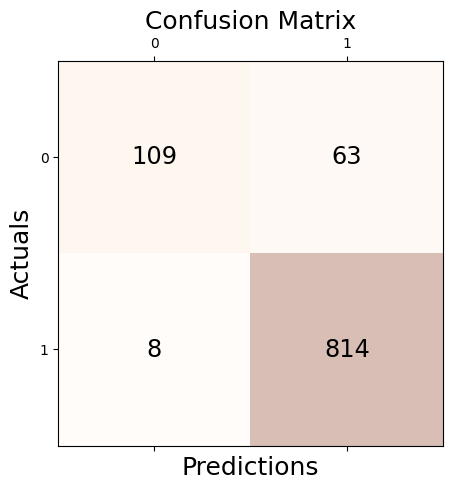

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtc = DecisionTreeClassifier()

In [40]:
dtc.fit(x_training_data, y_training_data)

DecisionTreeClassifier()

In [41]:
predictions_dtc = dtc.predict(x_test_data)

In [42]:
accuracy_score(y_test_data, predictions_dtc)

0.9275653923541247

In [43]:
print(confusion_matrix(y_test_data, predictions_dtc))

[[131  41]
 [ 31 791]]


In [44]:
conf_matrix = confusion_matrix(y_test_data, predictions_dtc)

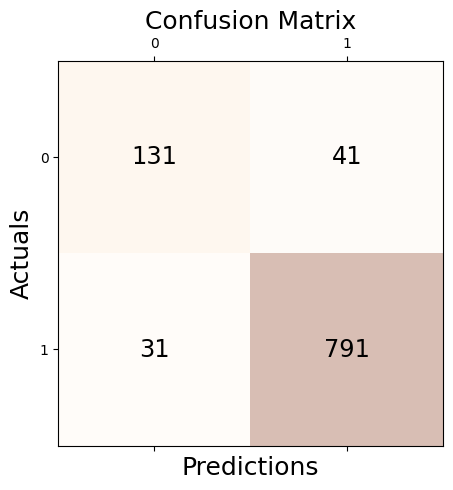

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Results

### Logistic Regression

In [46]:
accuracy_score(y_test_data, predictions)

0.9285714285714286

In [47]:
from sklearn.metrics import precision_score
precision_score(y_test_data, predictions)

0.928164196123147

In [90]:
from sklearn.metrics import recall_score
recall_score(y_test_data, predictions)

0.9902676399026764

### Decision Tree

In [48]:
accuracy_score(y_test_data, predictions_dtc)

0.9275653923541247

In [49]:
from sklearn.metrics import precision_score
precision_score(y_test_data, predictions_dtc)

0.9507211538461539

In [91]:
from sklearn.metrics import recall_score
recall_score(y_test_data, predictions_dtc)

0.962287104622871

## Correlation Score

In [50]:
df

,Sales,Quantity,Discount,Profit,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
0,48.896,4,0.2,1,0,0,0,0,0,0,1,0,0,1
1,474.430,11,0.0,1,0,0,0,0,0,0,1,0,0,1
2,3.600,2,0.0,1,1,0,0,1,0,0,0,0,0,0
3,454.560,5,0.2,0,1,0,0,0,0,0,1,0,0,1
4,141.420,5,0.6,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,90.930,7,0.0,1,0,1,0,0,0,0,1,0,0,1
3308,52.776,3,0.2,1,1,0,0,0,0,0,1,0,0,1
3309,13.904,2,0.2,1,1,0,1,0,0,0,1,0,0,1
3310,20.720,2,0.2,1,1,0,1,0,0,0,1,0,0,1


In [52]:
print(df['Profit'].corr(df['Office Supplies']))

0.12469615048215178


In [53]:
print(df['Profit'].corr(df['Corporate']))

0.01772827809518409


In [54]:
print(df['Profit'].corr(df['Quantity']))

0.015499827821095966


In [55]:
print(df['Profit'].corr(df['Home Office']))

-0.005221020373844092


In [56]:
print(df['Profit'].corr(df['Technology']))

0.055052356373247124


In [62]:
print(df['Profit'].corr(df['Discount']))

-0.753378479202078


In [63]:
print(df['Profit'].corr(df['Sales']))

-0.012462671052519133


In [64]:
print(df['Discount'].corr(df['Sales']))

-0.033515539135373015


In [65]:
df.corr()

,Sales,Quantity,Discount,Profit,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
Sales,1.000000,0.191127,-0.033516,-0.012463,-0.207997,0.176271,0.028141,0.016065,0.017030,0.004210,-0.025406,0.017030,0.004210,-0.025406
Quantity,0.191127,1.000000,0.019184,0.015500,0.037429,0.004327,0.019781,-0.022144,-0.021043,0.033110,-0.001051,-0.021043,0.033110,-0.001051
Discount,-0.033516,0.019184,1.000000,-0.753378,0.021295,-0.060817,0.004280,-0.016270,-0.003813,-0.068192,0.028080,-0.003813,-0.068192,0.028080
Profit,-0.012463,0.015500,-0.753378,1.000000,0.124696,0.055052,0.017728,-0.005221,-0.007333,0.060152,-0.027986,-0.007333,0.060152,-0.027986
Office Supplies,-0.207997,0.037429,0.021295,0.124696,1.000000,-0.595627,-0.001866,-0.017532,-0.006521,0.004435,0.017879,-0.006521,0.004435,0.017879
Technology,0.176271,0.004327,-0.060817,0.055052,-0.595627,1.000000,0.010763,0.024876,0.003208,-0.015069,0.002488,0.003208,-0.015069,0.002488
Corporate,0.028141,0.019781,0.004280,0.017728,-0.001866,0.010763,1.000000,-0.324619,-0.025963,0.004309,0.000922,-0.025963,0.004309,0.000922
Home Office,0.016065,-0.022144,-0.016270,-0.005221,-0.017532,0.024876,-0.324619,1.000000,0.038358,-0.039180,-0.005056,0.038358,-0.039180,-0.005056
Same Day,0.017030,-0.021043,-0.003813,-0.007333,-0.006521,0.003208,-0.025963,0.038358,1.000000,-0.121342,-0.282434,1.000000,-0.121342,-0.282434
Second Class,0.004210,0.033110,-0.068192,0.060152,0.004435,-0.015069,0.004309,-0.039180,-0.121342,1.000000,-0.575978,-0.121342,1.000000,-0.575978


In [66]:
print(df['Quantity'].corr(df['Sales']))

0.19112703587953495


In [82]:
online_retail_data = pd.read_csv('US  E-commerce records 2020.csv', encoding='unicode_escape')
df2 = pd.DataFrame(online_retail_data)
df2.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [75]:
# dropping unnecessary columns
df2.drop('Country', axis=1, inplace=True)
df2.drop('City', axis=1, inplace=True)
df2.drop('State', axis=1, inplace=True)
df2.drop('Postal Code', axis=1, inplace=True)
df2

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [76]:
# dropping unnecessary columns
df2.drop('Order Date', axis=1, inplace=True)
df2.drop('Row ID', axis=1, inplace=True)
df2.drop('Order ID', axis=1, inplace=True)
df2.drop('Customer ID', axis=1, inplace=True)
df2.drop('Product ID', axis=1, inplace=True)
df2.drop('Product Name', axis=1, inplace=True)
df2

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,East,Furniture,Furnishings,48.896,4,0.2,8.5568
1,Standard Class,Consumer,West,Furniture,Furnishings,474.430,11,0.0,199.2606
2,First Class,Home Office,Central,Office Supplies,Binders,3.600,2,0.0,1.7280
3,Standard Class,Consumer,Central,Office Supplies,Storage,454.560,5,0.2,-107.9580
4,Standard Class,Consumer,Central,Furniture,Furnishings,141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...
3307,Standard Class,Consumer,East,Technology,Phones,90.930,7,0.0,2.7279
3308,Standard Class,Consumer,East,Office Supplies,Binders,52.776,3,0.2,19.7910
3309,Standard Class,Corporate,West,Office Supplies,Binders,13.904,2,0.2,4.5188
3310,Standard Class,Corporate,West,Office Supplies,Binders,20.720,2,0.2,6.4750


In [81]:
df2 = pd.concat([df2, category_data], axis=1)
df2

,Ship Mode,Segment,Region,Sub-Category,Sales,Quantity,Discount,Profit,Office Supplies,Technology,Office Supplies,Technology
0,Standard Class,Consumer,East,Furnishings,48.896,4,0.2,8.5568,0,0,0,0
1,Standard Class,Consumer,West,Furnishings,474.430,11,0.0,199.2606,0,0,0,0
2,First Class,Home Office,Central,Binders,3.600,2,0.0,1.7280,1,0,1,0
3,Standard Class,Consumer,Central,Storage,454.560,5,0.2,-107.9580,1,0,1,0
4,Standard Class,Consumer,Central,Furnishings,141.420,5,0.6,-187.3815,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3307,Standard Class,Consumer,East,Phones,90.930,7,0.0,2.7279,0,1,0,1
3308,Standard Class,Consumer,East,Binders,52.776,3,0.2,19.7910,1,0,1,0
3309,Standard Class,Corporate,West,Binders,13.904,2,0.2,4.5188,1,0,1,0
3310,Standard Class,Corporate,West,Binders,20.720,2,0.2,6.4750,1,0,1,0


In [83]:
df

,Sales,Quantity,Discount,Profit,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
0,48.896,4,0.2,1,0,0,0,0,0,0,1,0,0,1
1,474.430,11,0.0,1,0,0,0,0,0,0,1,0,0,1
2,3.600,2,0.0,1,1,0,0,1,0,0,0,0,0,0
3,454.560,5,0.2,0,1,0,0,0,0,0,1,0,0,1
4,141.420,5,0.6,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,90.930,7,0.0,1,0,1,0,0,0,0,1,0,0,1
3308,52.776,3,0.2,1,1,0,0,0,0,0,1,0,0,1
3309,13.904,2,0.2,1,1,0,1,0,0,0,1,0,0,1
3310,20.720,2,0.2,1,1,0,1,0,0,0,1,0,0,1


In [84]:
df.drop('Profit', axis=1, inplace=True)

In [85]:
df

,Sales,Quantity,Discount,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class
0,48.896,4,0.2,0,0,0,0,0,0,1,0,0,1
1,474.430,11,0.0,0,0,0,0,0,0,1,0,0,1
2,3.600,2,0.0,1,0,0,1,0,0,0,0,0,0
3,454.560,5,0.2,1,0,0,0,0,0,1,0,0,1
4,141.420,5,0.6,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,90.930,7,0.0,0,1,0,0,0,0,1,0,0,1
3308,52.776,3,0.2,1,0,0,0,0,0,1,0,0,1
3309,13.904,2,0.2,1,0,1,0,0,0,1,0,0,1
3310,20.720,2,0.2,1,0,1,0,0,0,1,0,0,1


In [87]:
profit_data = df2['Profit']
profit_data

0         8.5568
1       199.2606
2         1.7280
3      -107.9580
4      -187.3815
          ...   
3307      2.7279
3308     19.7910
3309      4.5188
3310      6.4750
3311     -0.6048
Name: Profit, Length: 3312, dtype: float64

In [88]:
df = pd.concat([df, profit_data], axis=1)
df

,Sales,Quantity,Discount,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class,Profit
0,48.896,4,0.2,0,0,0,0,0,0,1,0,0,1,8.5568
1,474.430,11,0.0,0,0,0,0,0,0,1,0,0,1,199.2606
2,3.600,2,0.0,1,0,0,1,0,0,0,0,0,0,1.7280
3,454.560,5,0.2,1,0,0,0,0,0,1,0,0,1,-107.9580
4,141.420,5,0.6,0,0,0,0,0,0,1,0,0,1,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,90.930,7,0.0,0,1,0,0,0,0,1,0,0,1,2.7279
3308,52.776,3,0.2,1,0,0,0,0,0,1,0,0,1,19.7910
3309,13.904,2,0.2,1,0,1,0,0,0,1,0,0,1,4.5188
3310,20.720,2,0.2,1,0,1,0,0,0,1,0,0,1,6.4750


In [89]:
df.corr()

,Sales,Quantity,Discount,Office Supplies,Technology,Corporate,Home Office,Same Day,Second Class,Standard Class,Same Day,Second Class,Standard Class,Profit
Sales,1.000000,0.191127,-0.033516,-0.207997,0.176271,0.028141,0.016065,0.017030,0.004210,-0.025406,0.017030,0.004210,-0.025406,0.532312
Quantity,0.191127,1.000000,0.019184,0.037429,0.004327,0.019781,-0.022144,-0.021043,0.033110,-0.001051,-0.021043,0.033110,-0.001051,0.053766
Discount,-0.033516,0.019184,1.000000,0.021295,-0.060817,0.004280,-0.016270,-0.003813,-0.068192,0.028080,-0.003813,-0.068192,0.028080,-0.218343
Office Supplies,-0.207997,0.037429,0.021295,1.000000,-0.595627,-0.001866,-0.017532,-0.006521,0.004435,0.017879,-0.006521,0.004435,0.017879,-0.042756
Technology,0.176271,0.004327,-0.060817,-0.595627,1.000000,0.010763,0.024876,0.003208,-0.015069,0.002488,0.003208,-0.015069,0.002488,0.105621
Corporate,0.028141,0.019781,0.004280,-0.001866,0.010763,1.000000,-0.324619,-0.025963,0.004309,0.000922,-0.025963,0.004309,0.000922,-0.002368
Home Office,0.016065,-0.022144,-0.016270,-0.017532,0.024876,-0.324619,1.000000,0.038358,-0.039180,-0.005056,0.038358,-0.039180,-0.005056,0.007346
Same Day,0.017030,-0.021043,-0.003813,-0.006521,0.003208,-0.025963,0.038358,1.000000,-0.121342,-0.282434,1.000000,-0.121342,-0.282434,-0.010191
Second Class,0.004210,0.033110,-0.068192,0.004435,-0.015069,0.004309,-0.039180,-0.121342,1.000000,-0.575978,-0.121342,1.000000,-0.575978,0.006430
Standard Class,-0.025406,-0.001051,0.028080,0.017879,0.002488,0.000922,-0.005056,-0.282434,-0.575978,1.000000,-0.282434,-0.575978,1.000000,-0.011184
